**Problem Statement:**

The size of the brain is a frequent topic of study within the fields of anatomy, biological anthropology, animal science and evolution. Brain size is sometimes measured by weight and sometimes by volume (via MRI scans or by skull volume). 

Regarding "intelligence testing", a question that has been frequently investigated is the relation of brain size to intelligence. There are many ways to assess a person's intelligence. But Ed Klaber of Chelmsford, England, came up with one of his own. He wants to know if people with bigger heads have bigger brains. It is said that measuring the size of the head does give some indication of how big the brain is. 

Even though head size also depends on factors such as the muscularity of the head and thickness of the bone, it's very likely that a bigger head means a bigger brain. Thus, it seems that head size and the brain weight are very much related to each other in scientific terms. In this demonstration, we will try to prove this using machine learning. 

Generally, the Head size of humans gives impressions of the weight of brain. Thus, here we will try to predict the "Brain Weight" of the person using the "Head Size".

Below, you can find the dataset for this use case. The Head Brain file consist of four attributes (Gender, Age, Headsize, Brainweight) .

You have to train the machine for learning the size of head and the corresponding brain weight. Then, after learning/training, it should be able to predict the brain weight given on certain head size. 

Make sure to follow the steps mentioned below: 

    Complete the Exploratory Data Analysis(EDA).
    Understand the type of the problem and apply the appropriate model for its training and testing phase.

In [20]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ply
%matplotlib inline

In [21]:
#loading nad printing the head of the dataset
data = pd.read_csv("headbrain.csv")
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [22]:
data.shape

(237, 4)

A small introduction about the dataset this dataset contains 237 observations and 4 features and it contains all numerical data, the targeet variable of theis dataset is BrainWeight

## **Exploratory Data Analysis**

As we can see we have to predict the weight of the brain with the remaining features so i am going to apply regresson in this problem

In [23]:
#lets check the null values
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

There are no null values lets go further, lets see some visualizations

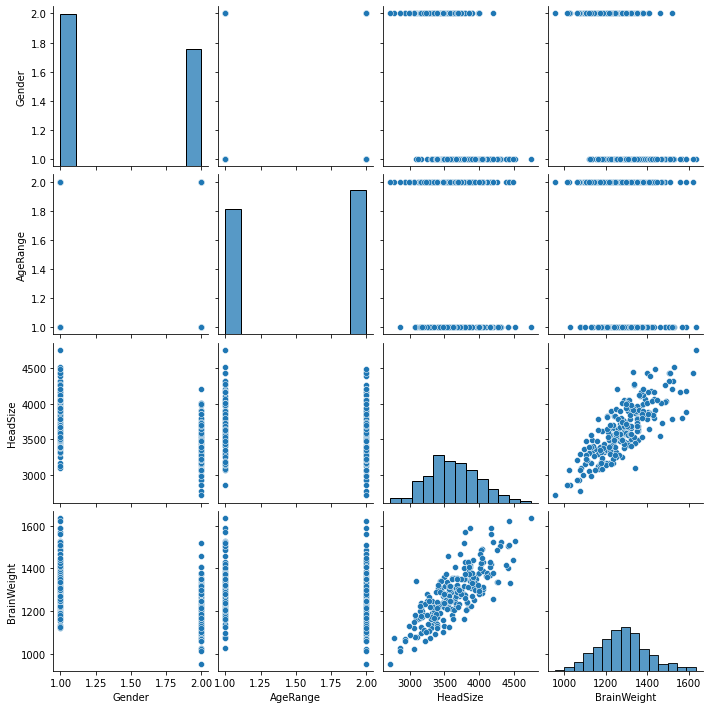

In [24]:
sns.pairplot(data)

## **Outlier detection and treatment**

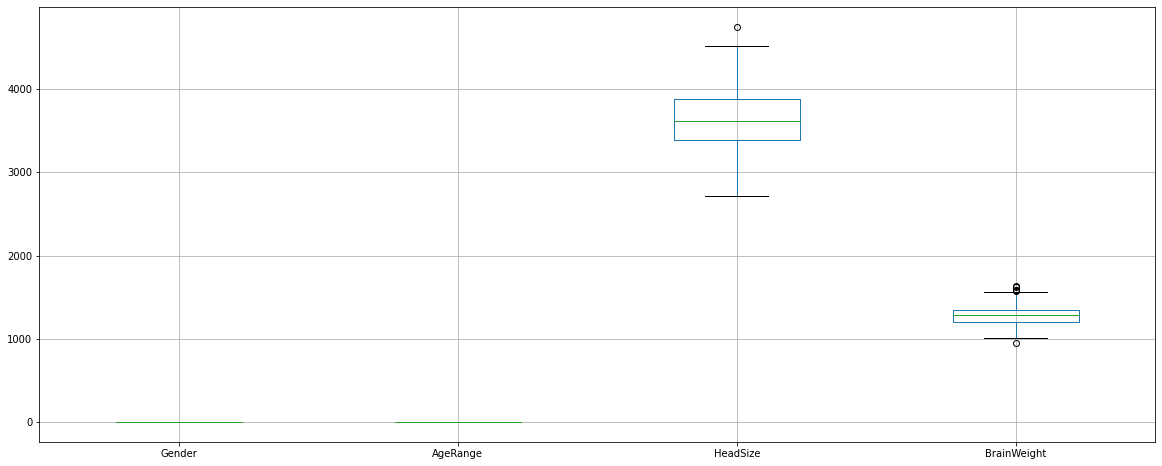

In [25]:
data.boxplot(figsize=[20,8])
plt.show()

No need to handle outliers as there are no outliers in the data lts proceed futther

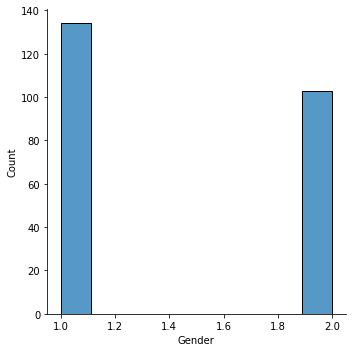

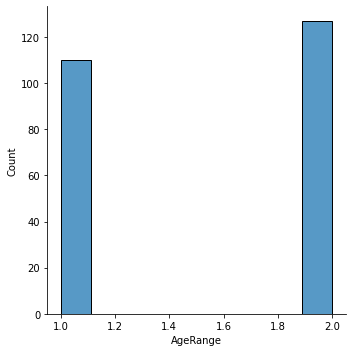

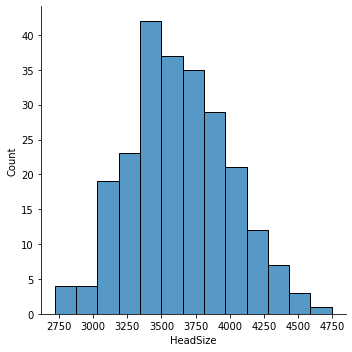

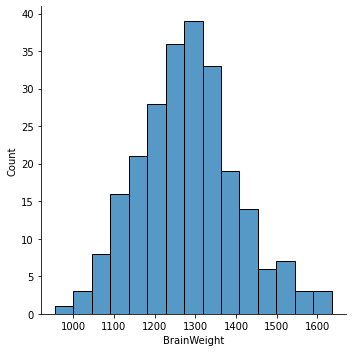

In [26]:
for i in data:
  sns.displot(data[i])
  plt.show()


Data sems normalized so no need to apply any transformation, now lets compare the ch variable to se how they are related to each other


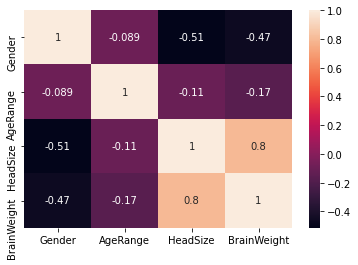

In [27]:
#now lets see the correlation between each variable so that we can eliminate the the high correlated columns
sns.heatmap(data.corr(), annot=True)

As we can see there are no high correlated values in the data and no need to remove any column in the data

In [28]:
#lets divide dependent and independent variable
x = data.drop(["BrainWeight"], axis = 1)

y = data["BrainWeight"]



## **feature scaling**

In [29]:
#we can see that as data columns are not of equal range and we have to make them into equal range so that we can apply machine learning model to them
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head()


,Gender,AgeRange,HeadSize
0,-0.876731,-1.074498,2.408868
1,-0.876731,-1.074498,0.285353
2,-0.876731,-1.074498,1.720235
3,-0.876731,-1.074498,0.392352
4,-0.876731,-1.074498,1.489776


Gender      0.265554
AgeRange   -0.144748
HeadSize    0.238807
dtype: float64


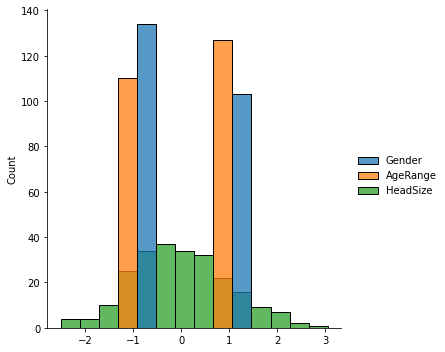

In [30]:
#lets check the skewness of the data
#actually skewness range should be -1.5 and +1.5
print(x.skew())
print(sns.displot(x))

In [31]:
#lets start creating machine learning model but first lets divide the testing and training set of the data
from sklearn.model_selection import train_test_split, KFold, cross_val_score,RandomizedSearchCV
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
ran = RandomForestRegressor()

models = []
models.append(('lr', LinearRegression()))
models.append(('l', Lasso()))
models.append(('r', Ridge()))
models.append(('dec', DecisionTreeRegressor()))
models.append(('ran', RandomForestRegressor()))

results = []
names = []

for name, model in models:
  kfold = KFold(n_splits= 5, random_state = 0, shuffle= False)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')

  results.append(cv_results)
  names.append(name)

  msg = "%s : %f (%f)" %(name, cv_results.mean(), cv_results.std())
  print(msg)

 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave ra

lr : 0.629712 (0.094639)
l : 0.629638 (0.094477)
r : 0.629889 (0.094605)
dec : 0.267212 (0.094435)
ran : 0.503223 (0.136711)


actually we got score of 62 percent and theat is good lets start predicting normal prediction

In [38]:
lr = LinearRegression()
l = Lasso()
r = Ridge()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
model = []
model.append(('lr', LinearRegression()))
model.append(('l', Lasso()))
model.append(('r', Ridge()))
model.append(('dec', DecisionTreeRegressor()))
model.append(('ran', RandomForestRegressor()))

for n,m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    prediction = m.predict(x_test)
    print(prediction)
    print("score of ",n,"is:", m.score(x_train,y_train)*100)
    print("MSE :",mean_squared_error(y_test, prediction))
    print("MAE :",mean_absolute_error(y_test, prediction))
    print("RMSE:", sqrt(mean_squared_error(y_test, prediction)))
    print('\n')

0.6413059040460092
[1476.16179522 1175.29806593 1310.91969739 1246.74310283 1173.0240921
 1251.3900558  1282.9328269  1229.87343769 1226.78266593 1200.85730417
 1393.28808255 1482.77125161 1196.26915785 1173.56961829 1420.32310467
 1414.04670939 1231.68228267 1192.22653772 1290.0476108  1226.02467466
 1122.23867672 1409.51736973 1292.57424838 1343.5133222  1348.60679603
 1283.18549066 1353.40740744 1144.72575119 1279.88225382 1245.79125445
 1255.08100684 1153.10385388 1430.97518119 1330.22114834 1034.56435264
 1180.35134109 1119.96470289 1296.26519942 1408.7005718  1251.85518465
 1392.78275503 1345.88630135 1512.08024755 1193.02472767 1341.99733965
 1449.16697177 1484.53989791 1273.02013367 1491.57428447 1314.24452492
 1331.67832424 1355.4287175  1473.1700288  1211.97450953 1251.03838671
 1280.15352556 1403.18216779 1177.06671223 1373.62050809 1283.37934776
 1511.82758379 1148.30324248 1210.35952165 1204.14193303 1308.99739266
 1302.17547119 1341.27954705 1357.50883422 1159.38024916 12

we can see that we have good scores and we need to choose one of the model for performing randomised search cv but linear regression has no certain tuning so lets go ahead and ab try it\

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), 

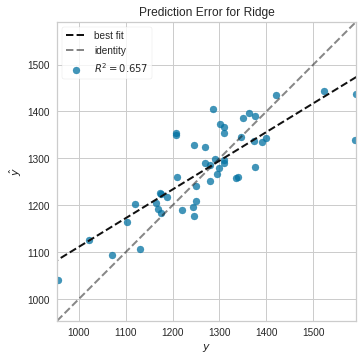

In [42]:
from yellowbrick.regressor import prediction_error



visualizer = prediction_error(r, x, y)


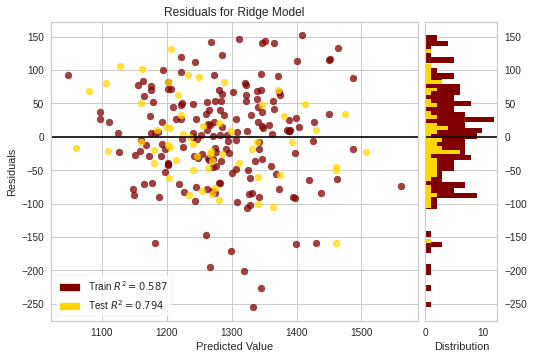

In [40]:
from yellowbrick.regressor import residuals_plot



visualizer = residuals_plot(
    r, x, y, train_color="maroon", test_color="gold"
)


In [36]:
#saving the model
import joblib
joblib.dump(Ridge(), "ridgemodel.obj")

['ridgemodel.obj']

In [37]:
model1 = joblib.load("ridgemodel.obj")